<a href="https://colab.research.google.com/github/ShreyasGandhi0607/dog_cat_classification/blob/main/dog_cat_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ./kaggle
!cp kaggle.json ~/.kaggle/


cp: cannot create regular file '/root/.kaggle/': Not a directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.05G/1.06G [00:05<00:00, 204MB/s]
100% 1.06G/1.06G [00:05<00:00, 209MB/s]


In [3]:
!unzip /content/dogs-vs-cats.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/train/dogs/dog.4419.jpg  
  inflating: /content/train/dogs/dog.442.jpg  
  inflating: /content/train/dogs/dog.4420.jpg  
  inflating: /content/train/dogs/dog.4421.jpg  
  inflating: /content/train/dogs/dog.4422.jpg  
  inflating: /content/train/dogs/dog.4424.jpg  
  inflating: /content/train/dogs/dog.4425.jpg  
  inflating: /content/train/dogs/dog.4426.jpg  
  inflating: /content/train/dogs/dog.4427.jpg  
  inflating: /content/train/dogs/dog.4431.jpg  
  inflating: /content/train/dogs/dog.4433.jpg  
  inflating: /content/train/dogs/dog.4436.jpg  
  inflating: /content/train/dogs/dog.4438.jpg  
  inflating: /content/train/dogs/dog.4439.jpg  
  inflating: /content/train/dogs/dog.444.jpg  
  inflating: /content/train/dogs/dog.4440.jpg  
  inflating: /content/train/dogs/dog.4441.jpg  
  inflating: /content/train/dogs/dog.4442.jpg  
  inflating: /content/train/dogs/dog.4443.jpg  
  inflating: /content/train/dogs/dog.44

In [4]:
# Importing all the required libraries
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers , models
from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img

import random
from keras.utils import plot_model
import os
from sklearn.metrics import confusion_matrix , classification_report , roc_curve , auc
import itertools
import seaborn as sns


In [5]:
list_cats = ['/content/dogs_vs_cats/train/cats/cat.0.jpg', '/content/dogs_vs_cats/train/cats/cat.1.jpg']

In [6]:
os.listdir('/content/dogs_vs_cats/train/dogs')

['dog.1230.jpg',
 'dog.7599.jpg',
 'dog.8534.jpg',
 'dog.11380.jpg',
 'dog.1805.jpg',
 'dog.7561.jpg',
 'dog.4266.jpg',
 'dog.5771.jpg',
 'dog.584.jpg',
 'dog.5411.jpg',
 'dog.8567.jpg',
 'dog.7225.jpg',
 'dog.11833.jpg',
 'dog.5663.jpg',
 'dog.8653.jpg',
 'dog.11479.jpg',
 'dog.11913.jpg',
 'dog.10533.jpg',
 'dog.1537.jpg',
 'dog.10688.jpg',
 'dog.4900.jpg',
 'dog.9114.jpg',
 'dog.3891.jpg',
 'dog.7334.jpg',
 'dog.8693.jpg',
 'dog.7423.jpg',
 'dog.774.jpg',
 'dog.9918.jpg',
 'dog.6557.jpg',
 'dog.4256.jpg',
 'dog.157.jpg',
 'dog.379.jpg',
 'dog.5667.jpg',
 'dog.2460.jpg',
 'dog.7477.jpg',
 'dog.6435.jpg',
 'dog.8061.jpg',
 'dog.2884.jpg',
 'dog.4512.jpg',
 'dog.9331.jpg',
 'dog.7231.jpg',
 'dog.3062.jpg',
 'dog.3879.jpg',
 'dog.7744.jpg',
 'dog.423.jpg',
 'dog.6688.jpg',
 'dog.9649.jpg',
 'dog.9513.jpg',
 'dog.11740.jpg',
 'dog.10648.jpg',
 'dog.121.jpg',
 'dog.10385.jpg',
 'dog.480.jpg',
 'dog.6991.jpg',
 'dog.5777.jpg',
 'dog.2110.jpg',
 'dog.12425.jpg',
 'dog.5179.jpg',
 'dog.10260

In [7]:
def plot_images_from_dir(directory_path , class_animal , num_images = 9):
  # Retrieve list of all file names in the directory
  images_filenames = os.listdir(directory_path)

  # If there are fewer images than requested, we'll just show them all

  if len(images_filenames) < num_images:
      num_images = len(images_filenames)

  # Randomly select 'num_images' number of file names
  selected_images = random.sample(images_filenames, num_images)

  # Plotting the images
  fig, axes = plt.subplots(3, 3, figsize=(8, 8))
  axes = axes.ravel()

  for i , image_file in enumerate(selected_images):
    image_path = os.path.join(directory_path, image_file)
    image = Image.open(image_path)
    axes[i].imshow(image)
    axes[i].set_title(f"Image : {class_animal}")
    axes[i].axis("off")

  plt.tight_layout()
  plt.show()

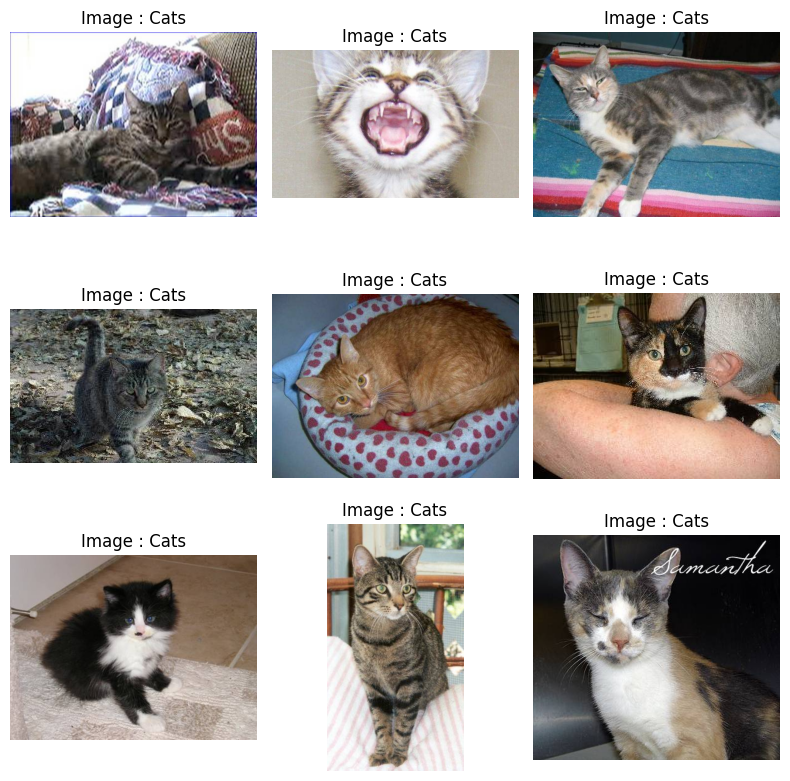

In [8]:
# Placeholder for the directory path
cat_dir_path = '/content/dogs_vs_cats/train/cats'

# Call the function with the directory path
plot_images_from_dir(cat_dir_path, 'Cats')

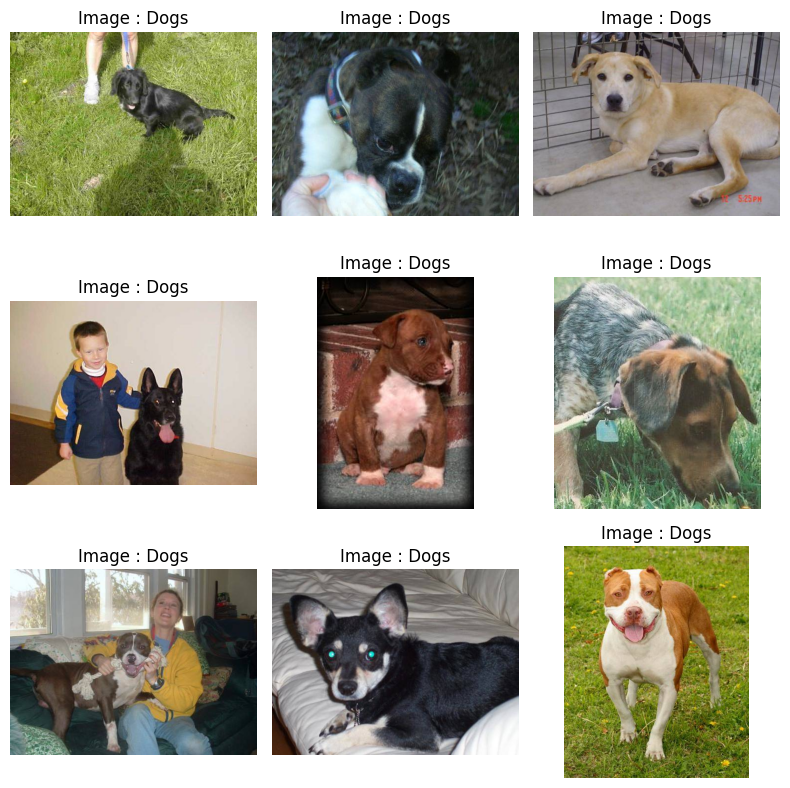

In [9]:
dogs_dir_path = '/content/dogs_vs_cats/train/dogs'
plot_images_from_dir(dogs_dir_path, 'Dogs')

In [10]:
cat_images = os.listdir('/content/dogs_vs_cats/train/cats')
dog_images = os.listdir('/content/dogs_vs_cats/train/dogs')

classes_animals = ['cats', 'dogs']

count = [len(cat_images), len(dog_images)]
print(count)

[10000, 10000]


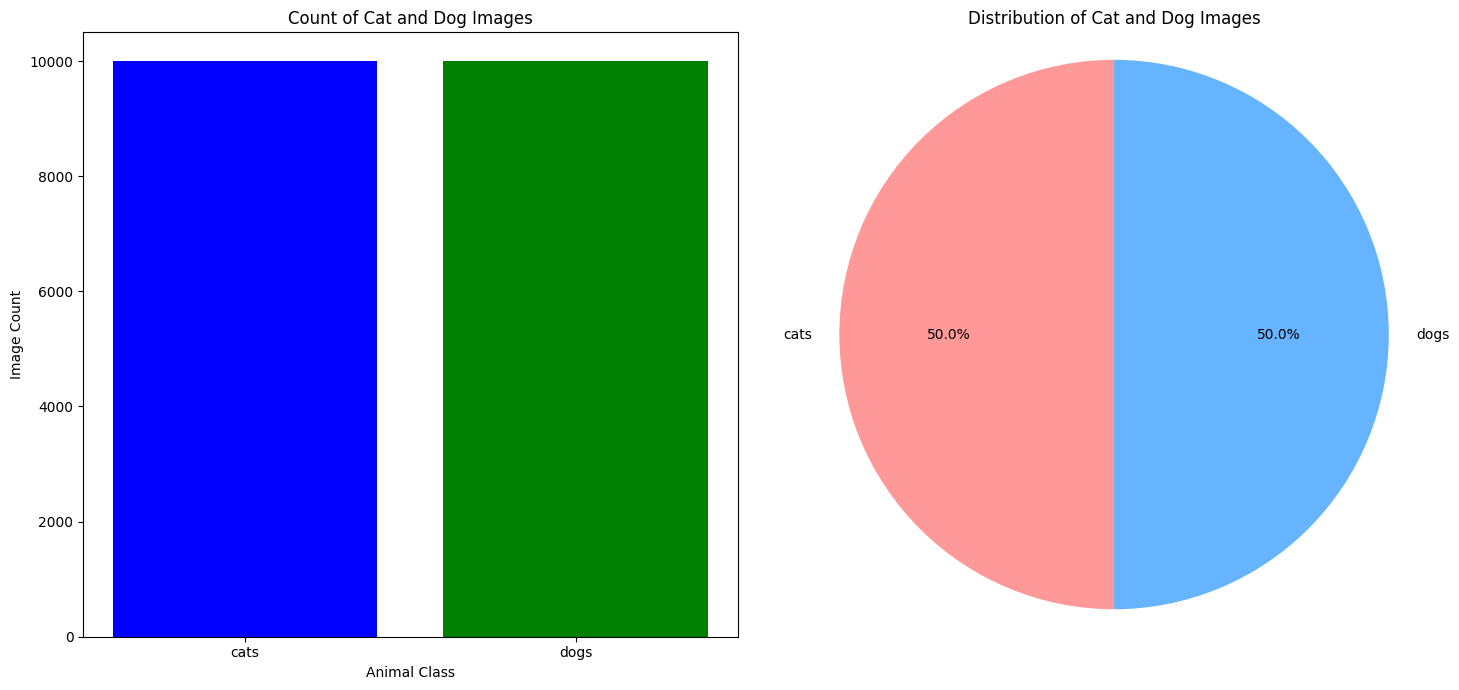

In [11]:
# Creating both a bar chart and a pie chart side by side in a single figure

# Setting up a figure and axes for two subplots: one for the bar chart, one for the pie chart

fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# Bar chart on the first subplot
ax[0].bar(classes_animals, count, color=['blue', 'green'])
ax[0].set_xlabel('Animal Class')
ax[0].set_ylabel('Image Count')
ax[0].set_title('Count of Cat and Dog Images')

# Pie chart on the second subplot
colors = ['#ff9999','#66b3ff']
ax[1].pie(count, labels=classes_animals, colors=colors, autopct='%1.1f%%', startangle=90)
ax[1].set_title('Distribution of Cat and Dog Images')
ax[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust the layout so that both subplots fit nicely
plt.tight_layout()
plt.show()

In [12]:
import os
import cv2
import imghdr

# Define the list of acceptable image extensions
image_exts = ['jpeg', 'jpg', 'png']

# Path to the directory containing image classes and possibly other nested subdirectories
data_dir = '/content/dogs_vs_cats'

# Walk through all directories and files in the dataset
for root, dirs, files in os.walk(data_dir):
    for file in files:
        # Construct the path to the current file
        file_path = os.path.join(root, file)

        try:
            # Check the file type of the current file
            file_type = imghdr.what(file_path)

            # If the file extension is not in the allowed list, remove it
            if file_type not in image_exts:
                print(f'Image not in ext list {file_path}')
                os.remove(file_path)
            else:
                # Proceed to process the image if needed, for example, reading it with OpenCV
                img = cv2.imread(file_path)

        except Exception as e:
            # Print out the issue and the path of the problematic file
            print(f'Issue with file {file_path}. Error: {e}')
            # Optionally, remove files that cause exceptions
            os.remove(file_path)


In [13]:
import numpy as np
from PIL import Image

def image_to_array(image_path):
    """
    Read an image and convert it to a numpy array.

    Parameters:
    image_path (str): The path to the image file.

    Returns:
    np.array: The image as a numpy array.
    """
    try:
        with Image.open(image_path) as img:
            image_array = np.array(img)
            return image_array
    except IOError:
        print(f"Could not read the image file at {image_path}.")
        return None

array([[[  9,   8,   4],
        [ 10,  11,   6],
        [ 13,  13,  11],
        ...,
        [160, 162, 183],
        [159, 161, 184],
        [158, 160, 183]],

       [[ 17,  13,  10],
        [ 16,  15,  11],
        [ 17,  17,  15],
        ...,
        [157, 159, 180],
        [156, 158, 181],
        [155, 157, 180]],

       [[ 17,  12,   8],
        [ 17,  13,  10],
        [ 17,  16,  14],
        ...,
        [155, 157, 178],
        [154, 156, 179],
        [153, 155, 178]],

       ...,

       [[110,  95,  88],
        [111,  96,  89],
        [112,  97,  90],
        ...,
        [128, 111, 101],
        [128, 112,  99],
        [128, 112,  99]],

       [[110,  95,  88],
        [109,  94,  87],
        [110,  95,  88],
        ...,
        [129, 112, 102],
        [129, 113, 100],
        [129, 113, 100]],

       [[113,  98,  91],
        [110,  95,  88],
        [109,  94,  87],
        ...,
        [125, 108,  98],
        [125, 109,  96],
        [125, 109,  96]]], dtype=uint8)
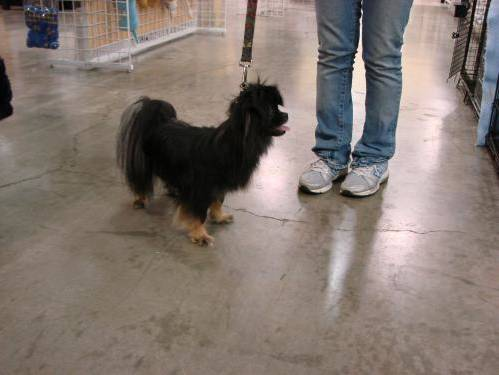

In [14]:
image_to_array('/content/dogs_vs_cats/train/dogs/dog.1000.jpg')

# Building Model

In [15]:
# Set path to the dataset
base_dir = '/content/dogs_vs_cats/train'

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [16]:
 # Using 20% of data for validation
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),  # Resizing images to 150x150
    batch_size=20,
    class_mode='binary',  # Since we use binary_crossentropy loss, we need binary labels
    subset='training')  # Set as training data

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    subset='validation')  # Set as validation data

Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [17]:
# Accessing class labels for the training data
train_class_labels = train_generator.class_indices
print("Training class labels:", train_class_labels)

# Accessing class labels for the validation data
validation_class_labels = validation_generator.class_indices
print("Validation class labels:", validation_class_labels)

Training class labels: {'cats': 0, 'dogs': 1}
Validation class labels: {'cats': 0, 'dogs': 1}


In [18]:
images, labels = next(train_generator)
images, labels

(array([[[[0.81568635, 0.12156864, 0.4784314 ],
          [0.882353  , 0.09019608, 0.4901961 ],
          [0.79215693, 0.10980393, 0.49411768],
          ...,
          [0.8078432 , 0.10588236, 0.5137255 ],
          [0.8588236 , 0.08235294, 0.5254902 ],
          [0.8588236 , 0.08235294, 0.5254902 ]],
 
         [[0.85098046, 0.08235294, 0.5058824 ],
          [0.91372555, 0.03921569, 0.5058824 ],
          [0.82745105, 0.09411766, 0.5137255 ],
          ...,
          [0.8470589 , 0.10196079, 0.53333336],
          [0.8705883 , 0.07450981, 0.53333336],
          [0.8588236 , 0.08235294, 0.5254902 ]],
 
         [[0.91372555, 0.05490196, 0.54901963],
          [0.9725491 , 0.02745098, 0.5372549 ],
          [0.8431373 , 0.10980393, 0.52156866],
          ...,
          [0.8235295 , 0.09803922, 0.49803925],
          [0.882353  , 0.07058824, 0.5254902 ],
          [0.8588236 , 0.08235294, 0.5254902 ]],
 
         ...,
 
         [[0.882353  , 0.06666667, 0.54509807],
          [0.89411

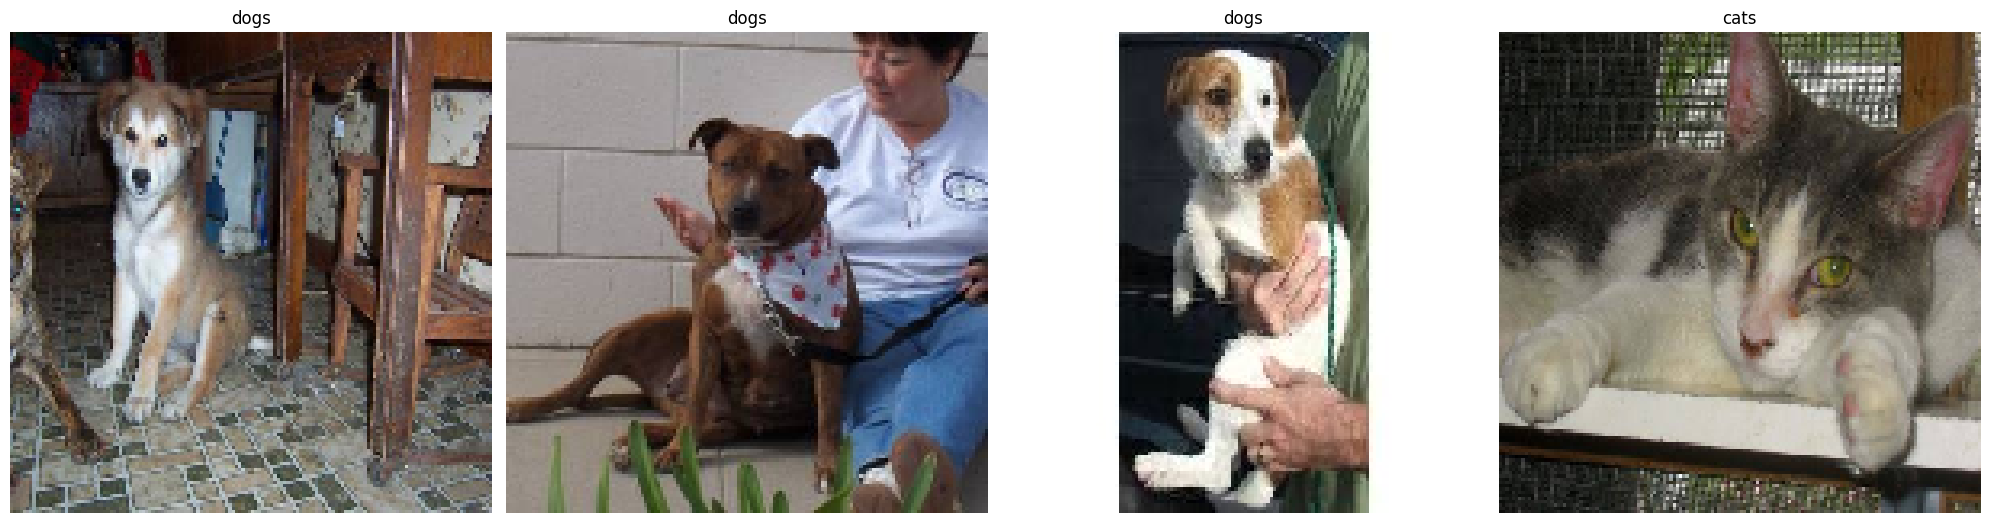

In [19]:
import matplotlib.pyplot as plt

# Function to plot images and their labels
def plot_images_from_generator(generator, num_images=4):
    # Get a batch of images and labels from the generator
    images, labels = next(generator)

    # Set up the plot
    fig, axes = plt.subplots(1, num_images, figsize=(20,20))
    axes = axes.flatten()

    for img, label, ax in zip(images, labels, axes):
        # Image preprocessing might differ, adjust accordingly
        ax.imshow(img)
        # Set the title to the class label
        # Inverse the class indices dictionary to get class names from labels
        class_labels = dict((v,k) for k,v in generator.class_indices.items())
        ax.set_title(class_labels[int(label)])
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Now, call this function with your training generator
plot_images_from_generator(train_generator, num_images=4)

In [20]:
train_generator.reset()

In [21]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

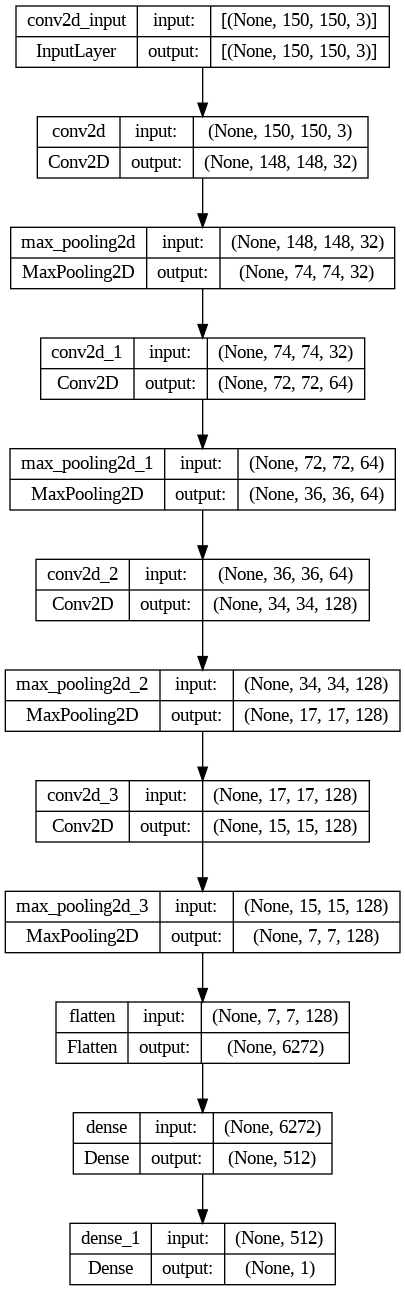

In [22]:
plot_model(model, to_file = 'Architecture.png',
           show_shapes=True, show_layer_names=True)

## Parameter Calculation in CNN Layers

### Conv2D Layer

The formula to calculate the number of parameters in a Conv2D layer is:

$$\text{Parameters} = (\text{kernel\_height} \times \text{kernel\_width} \times \text{input\_channels} + 1) \times \text{number\_of\_filters}$$

The "+1" accounts for the bias term for each filter.

#### 1. First Conv2D Layer

- Input shape: (150, 150, 3)
- Number of filters: 32
- Filter size: (3, 3)
- Parameters: $$(3 \times 3 \times 3 + 1) \times 32 = 896$$

#### 2. Second Conv2D Layer

- Input channels: 32 (from the previous Conv2D layer)
- Number of filters: 64
- Filter size: (3, 3)
- Parameters: $$(3 \times 3 \times 32 + 1) \times 64 = 18,496$$

#### 3. Third Conv2D Layer

- Input channels: 64
- Number of filters: 128
- Filter size: (3, 3)
- Parameters: $$(3 \times 3 \times 64 + 1) \times 128 = 73,856$$

#### 4. Fourth Conv2D Layer

- Input channels: 128
- Number of filters: 128
- Filter size: (3, 3)
- Parameters: $$(3 \times 3 \times 128 + 1) \times 128 = 147,584$$

### MaxPooling2D Layer

MaxPooling layers do not have parameters; they only reduce the size of the input they're applied to, based on their pool size and stride.

### Flatten Layer

The Flatten layer itself doesn't have parameters. It simply reshapes the input but does not affect the total parameter count.

### Dense Layer

The formula for a Dense (fully connected) layer is:

$$\text{Parameters} = (\text{input\_size} + 1) \times \text{output\_size}$$

#### 1. First Dense Layer

- Assuming Flatten output size: X (you'll need to calculate this based on the output of the last pooling layer).
- Output size: 512
- Parameters: $$(X + 1) \times 512$$

#### 2. Second Dense Layer

- Input size: 512
- Output size: 1 (for binary classification)
- Parameters: $$(512 + 1) \times 1 = 513$$


In [23]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [24]:
batch = 20
train_steps = np.ceil(train_generator.samples / batch)
validation_steps_per_epoch = np.ceil(validation_generator.samples / batch)
print(train_steps, validation_steps_per_epoch)

800.0 200.0


In [25]:
history = model.fit(
                    train_generator,
                    steps_per_epoch=800,
                    epochs=10,
                    validation_data=validation_generator,
                    validation_steps=200)

Epoch 1/10
800/800 [==============================] - 43s 45ms/step - loss: 0.6526 - accuracy: 0.5972 - val_loss: 0.5598 - val_accuracy: 0.7250
Epoch 2/10
800/800 [==============================] - 35s 43ms/step - loss: 0.5438 - accuracy: 0.7258 - val_loss: 0.4866 - val_accuracy: 0.7760
Epoch 3/10
800/800 [==============================] - 37s 46ms/step - loss: 0.4476 - accuracy: 0.7916 - val_loss: 0.4106 - val_accuracy: 0.8135
Epoch 4/10
800/800 [==============================] - 37s 47ms/step - loss: 0.3698 - accuracy: 0.8329 - val_loss: 0.4258 - val_accuracy: 0.8117
Epoch 5/10
800/800 [==============================] - 36s 45ms/step - loss: 0.3045 - accuracy: 0.8726 - val_loss: 0.3523 - val_accuracy: 0.8457
Epoch 6/10
800/800 [==============================] - 36s 45ms/step - loss: 0.2425 - accuracy: 0.8988 - val_loss: 0.4017 - val_accuracy: 0.8403
Epoch 7/10
800/800 [==============================] - 40s 50ms/step - loss: 0.1810 - accuracy: 0.9274 - val_loss: 0.5642 - val_accuracy:

In [26]:
history.history

{'loss': [0.6525802612304688,
  0.5438371300697327,
  0.4476354420185089,
  0.3697896897792816,
  0.30448105931282043,
  0.24253419041633606,
  0.18104055523872375,
  0.12861599028110504,
  0.0877169668674469,
  0.059411678463220596],
 'accuracy': [0.5972499847412109,
  0.7257500290870667,
  0.7915624976158142,
  0.8328750133514404,
  0.8726249933242798,
  0.8987500071525574,
  0.9273750185966492,
  0.9486250281333923,
  0.9678124785423279,
  0.9781249761581421],
 'val_loss': [0.5598042607307434,
  0.4866364002227783,
  0.41060763597488403,
  0.42578184604644775,
  0.35231727361679077,
  0.4016565978527069,
  0.5642356276512146,
  0.42471158504486084,
  0.5821306109428406,
  0.5983874797821045],
 'val_accuracy': [0.7250000238418579,
  0.7760000228881836,
  0.8134999871253967,
  0.8117499947547913,
  0.8457499742507935,
  0.8402500152587891,
  0.8012499809265137,
  0.8517500162124634,
  0.8352500200271606,
  0.8587499856948853]}

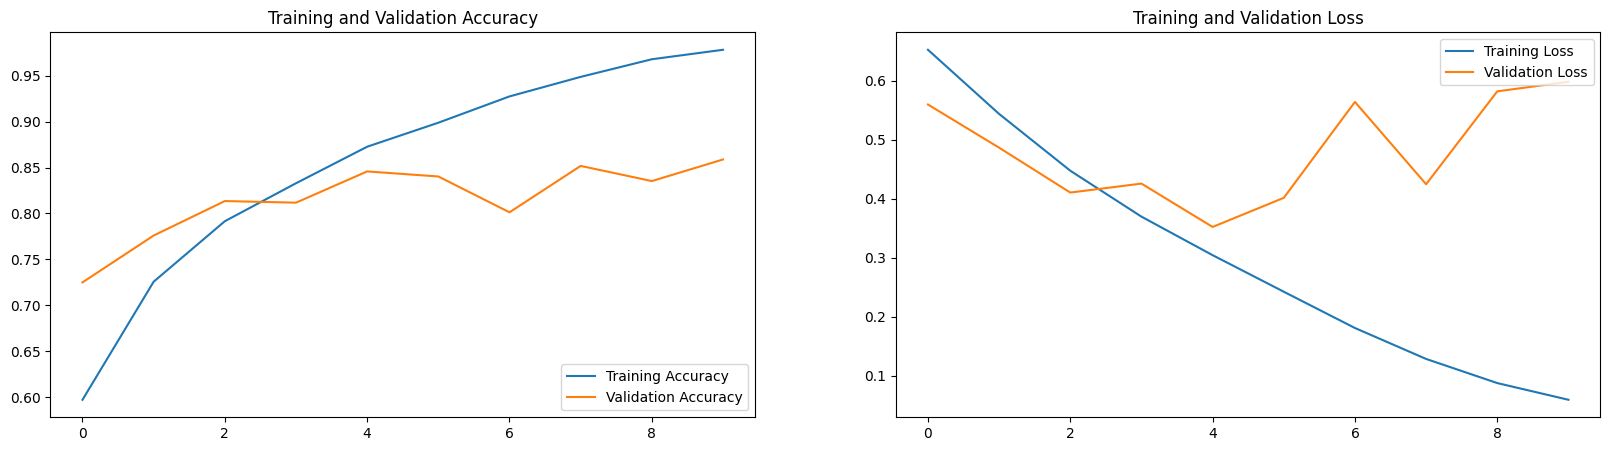

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Model Evaluation


In [28]:
test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for test data

test_dir = '/content/dogs_vs_cats/test'  # Path to your test directory

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),  # Should match the input size of your network
    batch_size=20,  # Can adjust based on your memory constraints
    class_mode='binary',  # Since we use binary_crossentropy loss, we need binary labels
    shuffle=False)  # No need to shuffle test data

Found 5000 images belonging to 2 classes.


In [29]:
np.ceil(test_generator.samples/test_generator.batch_size)

250.0

In [30]:
probabilities = model.predict(test_generator,
                              steps=np.ceil(test_generator.samples/test_generator.batch_size))
probabilities

250/250 [==============================] - 8s 30ms/step


array([[2.9398702e-11],
       [6.1073195e-07],
       [1.9799705e-01],
       ...,
       [9.9900657e-01],
       [7.7492848e-02],
       [9.3900144e-01]], dtype=float32)

In [31]:
# Reset the test generator
test_generator.reset()

# Get the true labels
true_classes = test_generator.classes

# Predict probabilities for the positive class
probabilities = model.predict(test_generator,
                              steps=np.ceil(test_generator.samples/test_generator.batch_size))

# The output is the probability of the positive class,
# so we will threshold it at 0.5 to decide the predicted class
predicted_classes = (probabilities > 0.5).astype(int).squeeze()


# Class labels are just [0, 1] for binary classification, or you can use custom labels if you have them
class_labels = list(test_generator.class_indices.keys())
predicted_classes

250/250 [==============================] - 8s 31ms/step


array([0, 0, 0, ..., 1, 0, 1])

## Plotting Confusion Matrix

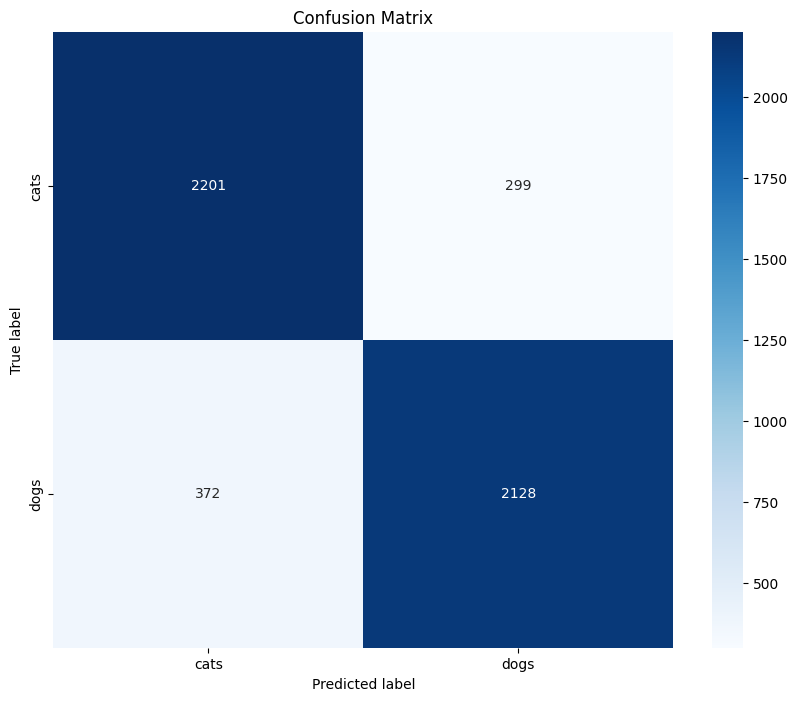

In [32]:
# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plotting with seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Inference

In [33]:
loss, accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {accuracy*100:.2f}%")
print(f"Test loss: {loss:.2f}")

250/250 [==============================] - 9s 38ms/step - loss: 0.5819 - accuracy: 0.8658
Test accuracy: 86.58%
Test loss: 0.58


## Single image prediction

In [38]:
def make_prediction(image_path):
    img = load_img(image_path, target_size=(150, 150))  # Resizing the image
    img_array = img_to_array(img)  # Converting to array using the Keras function
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.  # Rescale the image similarly as we did for the training data

    prediction = model.predict(img_array)
    print("Prediction:", prediction)

    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Original Image')
    plt.axis('off')

    # Prediction
    plt.subplot(1, 2, 2)
    if prediction[0][0] > 0.5:
        plt.title('Predicted: Dog')
    else:
        plt.title('Predicted: Cat')
    plt.imshow(img)  # Show the same image as prediction
    plt.axis('off')

    plt.show()

1/1 [==============================] - 0s 31ms/step
Prediction: [[0.00091602]]


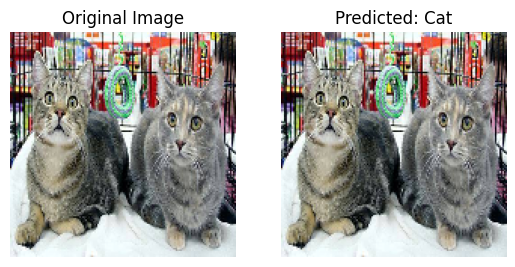

In [40]:
img_path = "/content/dogs_vs_cats/test/cats/cat.10064.jpg"
make_prediction(img_path)

1/1 [==============================] - 0s 17ms/step
Prediction: [[0.80179584]]


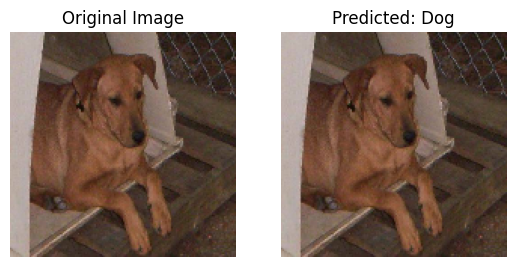

In [43]:
img_path = "/content/dogs_vs_cats/test/dogs/dog.100.jpg"
make_prediction(img_path)

# Misclassifications

In [44]:
# Reset the test_generator before making predictions
test_generator.reset()

# Predict the whole test set
predictions = model.predict(test_generator, verbose=1)

# The predictions will be in the format of probabilities. You'll need to convert these to binary labels (0 or 1) based on a 0.5 threshold.
predicted_classes = (predictions > 0.5).astype(int).reshape(-1)
true_classes = test_generator.classes
misclassified_indices = np.where(predicted_classes != true_classes)[0]
misclassified_count = len(misclassified_indices)
print(f"Total misclassifications in the test set: {misclassified_count} out of {len(true_classes)}")

250/250 [==============================] - 9s 34ms/step
Total misclassifications in the test set: 671 out of 5000


### Misclassified Images

250/250 [==============================] - 10s 39ms/step
Total misclassifications: 671


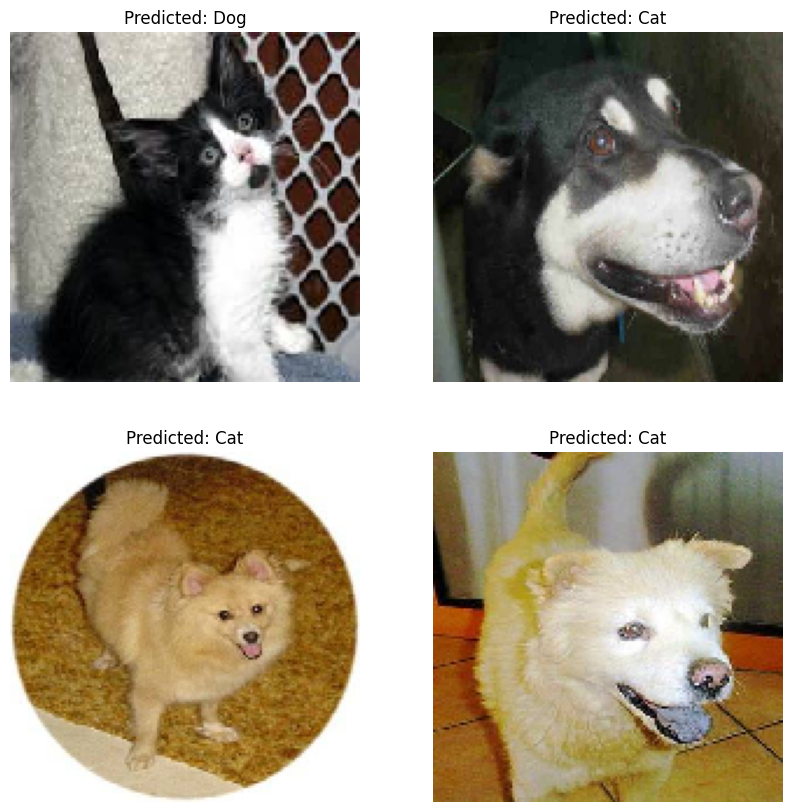

In [45]:
# Generate predictions for all test images
predictions = model.predict(test_generator)
# Convert predictions to binary (0 or 1) based on a 0.5 threshold
predicted_classes = predictions > 0.5

# Retrieve the true labels from the generator
true_classes = test_generator.classes

# Filenames can also be useful for debugging
filenames = test_generator.filenames
# Identifying indices of misclassified images
misclassified_indices = np.where(predicted_classes.flatten() != true_classes)[0]

print(f"Total misclassifications: {len(misclassified_indices)}")


# Select a random subset of misclassified images
num_samples_to_display = 4
random_indices = random.sample(list(misclassified_indices), num_samples_to_display)

# Plot
plt.figure(figsize=(10, 10))
for i, index in enumerate(random_indices, 1):
    # Load image
    img_path = test_dir + '/' + filenames[index]
    img = load_img(img_path, target_size=(150, 150))

    # Predicted class
    predicted_class = "Dog" if predicted_classes[index] else "Cat"

    # Display
    plt.subplot(2, 2, i)
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')
plt.show()